In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,plot_confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
import pandas as pd 
df=pd.read_csv("predictive_maintenance.csv")

In [16]:
tc=df['Target'].value_counts()
tc[1]/(tc[0]+tc[1])


0.0339

In [17]:
df['td']=df['Process temperature [K]']-df['Air temperature [K]']
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,td
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,10.5
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,10.5
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,10.4
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,10.4
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,10.5


In [465]:
df["Process_temp_normalized"]=(df["Process temperature [K]"]-min(df['Air temperature [K]']))/(max(df['Process temperature [K]'])-min(df['Air temperature [K]']))
df["Air_temp_normalized"]=(df["Air temperature [K]"]-min(df['Air temperature [K]']))/(max(df['Process temperature [K]'])-min(df['Air temperature [K]']))
df['Temp_diff']=(df["td"]-min(df['td']))/(max(df['td'])-min(df['td']))
df["rot"]=(df["Rotational speed [rpm]"]-min(df['Rotational speed [rpm]']))/(max(df['Rotational speed [rpm]'])-min(df['Rotational speed [rpm]']))
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,td,Process_temp_normalized,Air_temp_normalized,Temp_diff,Torque_norm,Tool_norm,rot
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,10.5,0.718919,0.151351,0.644444,0.535714,0.000000,0.222934
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,10.5,0.724324,0.156757,0.644444,0.583791,0.011858,0.139697
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,10.4,0.713514,0.151351,0.622222,0.626374,0.019763,0.192084
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,10.4,0.718919,0.156757,0.622222,0.490385,0.027668,0.154249
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,10.5,0.724324,0.156757,0.644444,0.497253,0.035573,0.139697


In [466]:
df['Torque_norm']=(df['Torque [Nm]']-min(df['Torque [Nm]']))/(max(df['Torque [Nm]'])-min(df['Torque [Nm]']))
df['Tool_norm']=(df['Tool wear [min]']-min(df['Tool wear [min]']))/(max(df['Tool wear [min]'])-min(df['Tool wear [min]']))


In [467]:
df_pass=df[df['Target']==0]
df_pass=df_pass[df_pass['Failure Type']=='No Failure']
df_fail=df[df['Target']==1]
df_fail=df_fail[df_fail['Failure Type']!='No Failure']

In [468]:
df_drop=df.drop(columns=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]',
                        'Torque [Nm]','Tool wear [min]','Product ID','UDI','Temp_diff','td','Failure Type'])
df_drop

,Type,Target,Process_temp_normalized,Air_temp_normalized,Torque_norm,Tool_norm,rot
0,M,0,0.718919,0.151351,0.535714,0.000000,0.222934
1,L,0,0.724324,0.156757,0.583791,0.011858,0.139697
2,L,0,0.713514,0.151351,0.626374,0.019763,0.192084
3,L,0,0.718919,0.156757,0.490385,0.027668,0.154249
4,L,0,0.724324,0.156757,0.497253,0.035573,0.139697
...,...,...,...,...,...,...,...
9995,M,0,0.708108,0.189189,0.353022,0.055336,0.253783
9996,H,0,0.708108,0.194595,0.384615,0.067194,0.270081
9997,M,0,0.718919,0.200000,0.406593,0.086957,0.277648
9998,H,0,0.724324,0.200000,0.614011,0.098814,0.139697


In [469]:
df_drop = pd.get_dummies(data=df_drop, columns=['Type'],drop_first=True)
df_drop.head()

,Target,Process_temp_normalized,Air_temp_normalized,Torque_norm,Tool_norm,rot,Type_L,Type_M
0,0,0.718919,0.151351,0.535714,0.000000,0.222934,0,1
1,0,0.724324,0.156757,0.583791,0.011858,0.139697,1,0
2,0,0.713514,0.151351,0.626374,0.019763,0.192084,1,0
3,0,0.718919,0.156757,0.490385,0.027668,0.154249,1,0
4,0,0.724324,0.156757,0.497253,0.035573,0.139697,1,0


In [470]:
df["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [471]:
df_fail_targ=df_fail_train=df_drop.iloc[:,0]
df_fail_train=df_drop.iloc[:,1:]

In [472]:
X_train,X_test,y_train,y_test = train_test_split(df_fail_train,df_fail_targ,test_size=0.2,random_state=21)

In [473]:

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

train_acc = round(svc.score(X_train, y_train) * 100, 1)
val_acc = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",train_acc ,"%")
print("Model Accuracy Score :",val_acc ,"%")


Training Accuracy    : 96.8 %
Model Accuracy Score : 96.2 %


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


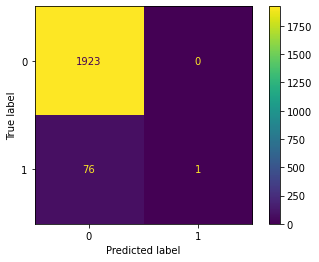

In [474]:
plot_confusion_matrix(svc, X_test, y_test)

In [475]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
svc = SVC()
X_res, y_res = sm.fit_resample(X_train, y_train)
svc.fit(X_res, y_res)
y_pred = svc.predict(X_test)

train_acc = round(svc.score(X_train, y_train) * 100, 1)
val_acc = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",train_acc ,"%")
print("Model Accuracy Score :",val_acc ,"%")

Training Accuracy    : 88.5 %
Model Accuracy Score : 89.3 %


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


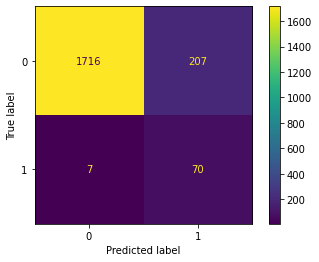

In [476]:
plot_confusion_matrix(svc, X_test, y_test)

In [477]:
df_drop=df.drop(columns=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]',
                        'Torque [Nm]','Tool wear [min]','Product ID','UDI','td','Failure Type'])
df_drop

,Type,Target,Process_temp_normalized,Air_temp_normalized,Temp_diff,Torque_norm,Tool_norm,rot
0,M,0,0.718919,0.151351,0.644444,0.535714,0.000000,0.222934
1,L,0,0.724324,0.156757,0.644444,0.583791,0.011858,0.139697
2,L,0,0.713514,0.151351,0.622222,0.626374,0.019763,0.192084
3,L,0,0.718919,0.156757,0.622222,0.490385,0.027668,0.154249
4,L,0,0.724324,0.156757,0.644444,0.497253,0.035573,0.139697
...,...,...,...,...,...,...,...,...
9995,M,0,0.708108,0.189189,0.444444,0.353022,0.055336,0.253783
9996,H,0,0.708108,0.194595,0.422222,0.384615,0.067194,0.270081
9997,M,0,0.718919,0.200000,0.444444,0.406593,0.086957,0.277648
9998,H,0,0.724324,0.200000,0.466667,0.614011,0.098814,0.139697


In [478]:
df_drop = pd.get_dummies(data=df_drop, columns=['Type'],drop_first=True)
df_drop.head()

,Target,Process_temp_normalized,Air_temp_normalized,Temp_diff,Torque_norm,Tool_norm,rot,Type_L,Type_M
0,0,0.718919,0.151351,0.644444,0.535714,0.000000,0.222934,0,1
1,0,0.724324,0.156757,0.644444,0.583791,0.011858,0.139697,1,0
2,0,0.713514,0.151351,0.622222,0.626374,0.019763,0.192084,1,0
3,0,0.718919,0.156757,0.622222,0.490385,0.027668,0.154249,1,0
4,0,0.724324,0.156757,0.644444,0.497253,0.035573,0.139697,1,0


In [479]:
df_fail_targ=df_fail_train=df_drop.iloc[:,0]
df_fail_train=df_drop.iloc[:,1:]

In [480]:
X_train,X_test,y_train,y_test = train_test_split(df_fail_train,df_fail_targ,test_size=0.2,random_state=21)

In [481]:

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

train_acc = round(svc.score(X_train, y_train) * 100, 1)
val_acc = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",train_acc ,"%")
print("Model Accuracy Score :",val_acc ,"%")


Training Accuracy    : 96.9 %
Model Accuracy Score : 96.3 %


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


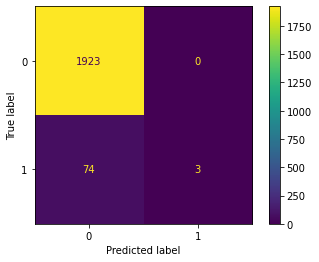

In [482]:
plot_confusion_matrix(svc, X_test, y_test)

In [483]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
svc = SVC()
X_res, y_res = sm.fit_resample(X_train, y_train)
svc.fit(X_res, y_res)
y_pred = svc.predict(X_test)

train_acc = round(svc.score(X_train, y_train) * 100, 1)
val_acc = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",train_acc ,"%")
print("Model Accuracy Score :",val_acc ,"%")

Training Accuracy    : 89.9 %
Model Accuracy Score : 90.6 %


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


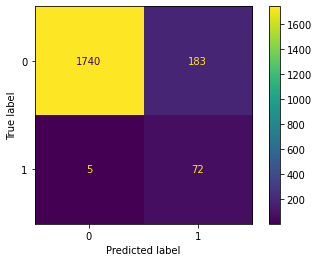

In [484]:
plot_confusion_matrix(svc, X_test, y_test)

In [487]:
from sklearn.inspection import DecisionBoundaryDisplay


In [488]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(X_res)

,Process_temp_normalized,Air_temp_normalized,Temp_diff,Torque_norm,Tool_norm,rot,Type_L,Type_M
0,0.913514,0.405405,0.400000,0.648352,0.166008,0.168801,1.0,0.0
1,0.972973,0.470270,0.377778,0.425824,0.833992,0.210710,1.0,0.0
2,0.648649,0.135135,0.422222,0.559066,0.011858,0.157159,1.0,0.0
3,0.713514,0.205405,0.400000,0.373626,0.272727,0.295693,1.0,0.0
4,0.718919,0.151351,0.644444,0.535714,0.000000,0.222934,0.0,1.0
...,...,...,...,...,...,...,...,...
15471,0.745565,0.149535,0.761457,0.118180,0.446009,0.830046,1.0,0.0
15472,0.789189,0.216732,0.664546,0.426947,0.209712,0.366097,0.0,0.0
15473,0.877139,0.268068,0.815068,0.654593,0.868090,0.129920,1.0,0.0
15474,0.856370,0.357528,0.361906,0.839873,0.773008,0.084067,1.0,0.0


In [489]:
np.all(np.isfinite(X_res))

True

In [491]:
df_drop=df.drop(columns=['Air temperature [K]','Process temperature [K]', "Rotational speed [rpm]", 
                        'Torque [Nm]','Tool wear [min]','Product ID','UDI','td','Failure Type', "Type", "Temp_diff",
                        "Process_temp_normalized", "Air_temp_normalized", "Tool_norm"])
df_drop

,Target,Torque_norm,rot
0,0,0.535714,0.222934
1,0,0.583791,0.139697
2,0,0.626374,0.192084
3,0,0.490385,0.154249
4,0,0.497253,0.139697
...,...,...,...
9995,0,0.353022,0.253783
9996,0,0.384615,0.270081
9997,0,0.406593,0.277648
9998,0,0.614011,0.139697


In [500]:
df_drop

,Target,Torque_norm,rot
0,0,0.535714,0.222934
1,0,0.583791,0.139697
2,0,0.626374,0.192084
3,0,0.490385,0.154249
4,0,0.497253,0.139697
...,...,...,...
9995,0,0.353022,0.253783
9996,0,0.384615,0.270081
9997,0,0.406593,0.277648
9998,0,0.614011,0.139697


<AxesSubplot:xlabel='Torque_norm', ylabel='rot'>

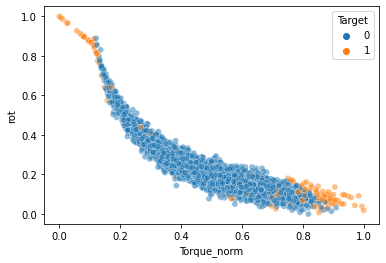

In [493]:
sns.scatterplot(data=df_drop, x="Torque_norm", y="rot",hue="Target",alpha=0.5)

In [501]:
df_fail_targ=df_fail_train=df_drop.iloc[:,0]
df_fail_train=df_drop.drop(columns=['Target'])

In [502]:
X_train,X_test,y_train,y_test = train_test_split(df_fail_train,df_fail_targ,test_size=0.2,random_state=21)

In [503]:
from sklearn import tree
from imblearn.over_sampling import BorderlineSMOTE

In [504]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
svc = tree.DecisionTreeClassifier(max_depth=5)
X_res, y_res = sm.fit_resample(X_train, y_train)
svc.fit(X_res, y_res)
y_pred = svc.predict(X_test)

train_acc = round(svc.score(X_train, y_train) * 100, 1)
val_acc = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",train_acc ,"%")
print("Model Accuracy Score :",val_acc ,"%")

Training Accuracy    : 87.0 %
Model Accuracy Score : 86.55 %


In [505]:
y_res.value_counts()

0    7738
1    7738
Name: Target, dtype: int64

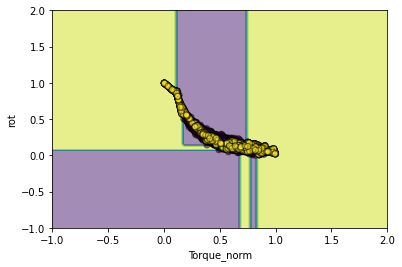

In [506]:
disp = DecisionBoundaryDisplay.from_estimator(
    svc, X_res, response_method="predict",
    alpha=0.5,
 )
disp.ax_.scatter(X_res.to_numpy()[:, 0], X_res.to_numpy()[:, 1], c=y_res, edgecolor="k",alpha=0.5)

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


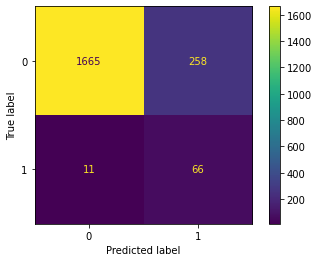

In [507]:
plot_confusion_matrix(svc, X_test, y_test)

In [508]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
svc = tree.DecisionTreeClassifier(max_depth=3)
X_res, y_res = X_train, y_train
svc.fit(X_res, y_res)
y_pred = svc.predict(X_test)

train_acc = round(svc.score(X_train, y_train) * 100, 1)
val_acc = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",train_acc ,"%")
print("Model Accuracy Score :",val_acc ,"%")

Training Accuracy    : 97.5 %
Model Accuracy Score : 96.8 %


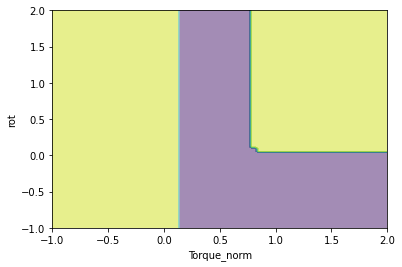

In [509]:
disp = DecisionBoundaryDisplay.from_estimator(
    svc, X_res, response_method="predict",
    alpha=0.5,
 )
#disp.ax_.scatter(X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1], c=y_train, edgecolor="k",alpha=0.5)

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


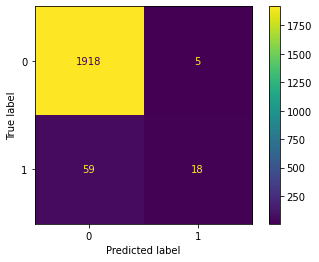

In [510]:
plot_confusion_matrix(svc, X_test, y_test)

In [511]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
svc = tree.DecisionTreeClassifier(max_depth=5, class_weight={0:0.03/0.97, 1:1})
X_res, y_res = X_train, y_train
svc.fit(X_res, y_res)
y_pred = svc.predict(X_test)

train_acc = round(svc.score(X_train, y_train) * 100, 1)
val_acc = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",train_acc ,"%")
print("Model Accuracy Score :",val_acc ,"%")

Training Accuracy    : 85.8 %
Model Accuracy Score : 85.7 %


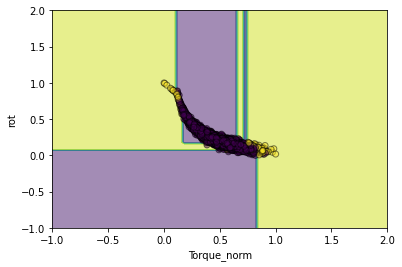

In [512]:
disp = DecisionBoundaryDisplay.from_estimator(
    svc, X_res, response_method="predict",
    alpha=0.5,
 )
disp.ax_.scatter(X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1], c=y_train, edgecolor="k",alpha=0.5)

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


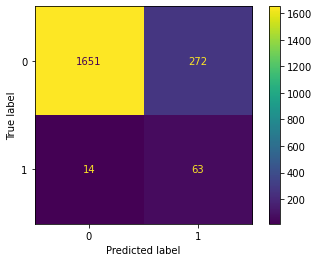

In [513]:
plot_confusion_matrix(svc, X_test, y_test)

Training Accuracy    : 97.3 %
Model Accuracy Score : 96.85 %


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


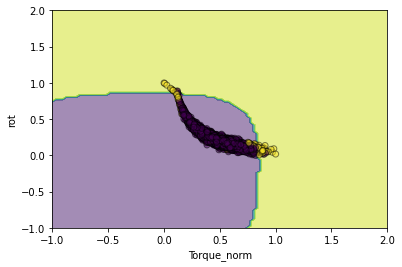

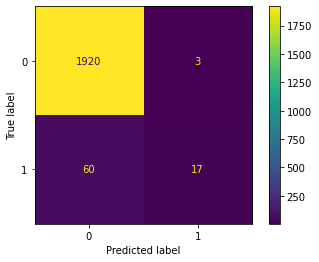

In [518]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
lr = LogisticRegression(class_weight={0:1, 1:1}, max_iter=300)
poly = PolynomialFeatures(degree = 4, interaction_only=False, include_bias=False)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
svc = pipe 
X_res, y_res = X_train, y_train
svc.fit(X_res, y_res)
y_pred = svc.predict(X_test)

train_acc = round(svc.score(X_train, y_train) * 100, 1)
val_acc = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",train_acc ,"%")
print("Model Accuracy Score :",val_acc ,"%")
disp = DecisionBoundaryDisplay.from_estimator(
    svc, X_res, response_method="predict",
    alpha=0.5,
 )
disp.ax_.scatter(X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1], c=y_train, edgecolor="k",alpha=0.5)
plot_confusion_matrix(svc, X_test, y_test)

Training Accuracy    : 82.1 %
Model Accuracy Score : 84.2 %


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


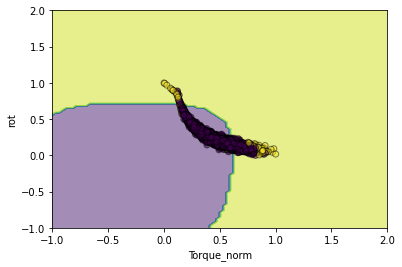

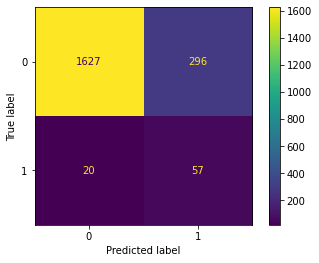

In [519]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
lr = LogisticRegression(class_weight={0:0.03/0.97, 1:1}, max_iter=300)
poly = PolynomialFeatures(degree = 4, interaction_only=False, include_bias=False)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
svc = pipe 
X_res, y_res = X_train, y_train
svc.fit(X_res, y_res)
y_pred = svc.predict(X_test)

train_acc = round(svc.score(X_train, y_train) * 100, 1)
val_acc = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",train_acc ,"%")
print("Model Accuracy Score :",val_acc ,"%")
disp = DecisionBoundaryDisplay.from_estimator(
    svc, X_res, response_method="predict",
    alpha=0.5,
 )
disp.ax_.scatter(X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1], c=y_train, edgecolor="k",alpha=0.5)
plot_confusion_matrix(svc, X_test, y_test)

Training Accuracy    : 84.4 %
Model Accuracy Score : 85.7 %


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


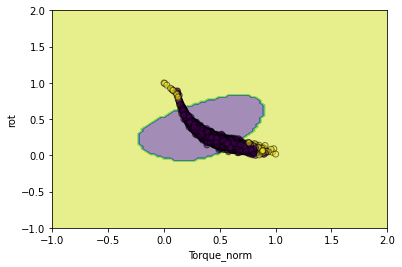

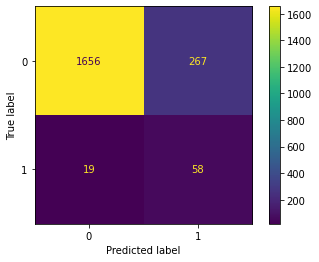

In [522]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
lr = LogisticRegression(class_weight={0:1, 1:1}, max_iter=300)
poly = PolynomialFeatures(degree = 4, interaction_only=False, include_bias=False)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
svc = pipe 
X_res, y_res = sm.fit_resample(X_train, y_train)
svc.fit(X_res, y_res)
y_pred = svc.predict(X_test)

train_acc = round(svc.score(X_train, y_train) * 100, 1)
val_acc = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",train_acc ,"%")
print("Model Accuracy Score :",val_acc ,"%")
disp = DecisionBoundaryDisplay.from_estimator(
    svc, X_res, response_method="predict",
    alpha=0.5,
 )
disp.ax_.scatter(X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1], c=y_train, edgecolor="k",alpha=0.5)
plot_confusion_matrix(svc, X_test, y_test)

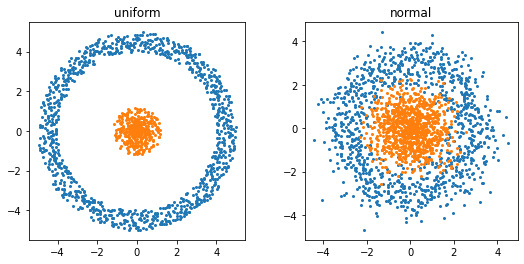

In [380]:
import matplotlib.pyplot as plt
import numpy as np

def dist(R=4., width=1., num=1000, uniform=True):
    if uniform:
        r = np.random.rand(num)*width+R
    else:
        r = np.random.normal(R, width, num)
    phi = np.linspace(0,2.*np.pi, len(r))
    x= r * np.sin(phi)
    y = r* np.cos(phi)
    return x,y

fig, ax = plt.subplots(ncols=2, figsize=(9,4))

ax[0].set_title("uniform")
x,y = dist()
ax[0].plot(x,y, linestyle="", marker="o", markersize="2")
x,y = dist(0,1.2, 400)
ax[0].plot(x,y, linestyle="", marker="o", markersize="2")

ax[1].set_title("normal")
x,y = dist(3,0.6, uniform=False)
ax[1].plot(x,y, linestyle="", marker="o", markersize="2")
x,y = dist(1,0.6, uniform=False)
ax[1].plot(x,y, linestyle="", marker="o", markersize="2")

for a in ax:
    a.set_aspect("equal")
plt.show()

In [354]:
def circle_data(n_pos, n_neg) : 
    x,y = dist(3,0.6,num=n_pos, uniform=False)
    x2,y2 = dist(1,0.6,num=n_neg, uniform=False)   
    combined = np.vstack((x, y)).T
    combined2 = np.vstack((x2, y2)).T
    x_sum = np.concatenate([combined, combined2])
    y = [1]*n_pos + [0]*n_neg
    return x_sum, y

In [436]:
n = 3
x_sum, y = circle_data(10*n,320*n)

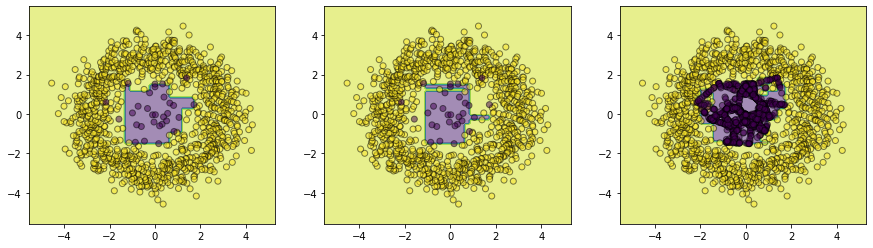

In [797]:

svc = tree.DecisionTreeClassifier(max_depth=20, class_weight={0:0.03/0.97, 1:1})
X_res, y_res = x_sum, y
svc.fit(X_res, y_res)

fig, ax = plt.subplots(ncols=3, figsize=(15,4))
disp = DecisionBoundaryDisplay.from_estimator(
    svc, x_sum, response_method="predict",
    alpha=0.5,  ax=ax[1]
 )
disp.ax_.scatter(x_sum[:, 0], x_sum[:, 1], c=y, edgecolor="k",alpha=0.5)

svc = tree.DecisionTreeClassifier(max_depth=20, class_weight={0:1, 1:1})
X_res, y_res = x_sum, y
svc.fit(X_res, y_res)

disp = DecisionBoundaryDisplay.from_estimator(
    svc, x_sum, response_method="predict",
    alpha=0.5,  ax=ax[0]
 )
disp.ax_.scatter(x_sum[:, 0], x_sum[:, 1], c=y, edgecolor="k",alpha=0.5)

 
sm = SMOTE(random_state=42)
svc = tree.DecisionTreeClassifier(max_depth=20)
X_res, y_res = sm.fit_resample(x_sum, y)
svc.fit(X_res, y_res)

disp = DecisionBoundaryDisplay.from_estimator(
    svc, x_sum, response_method="predict",
    alpha=0.5, ax=ax[2],
 )
disp.ax_.scatter(X_res[:, 0], X_res[:, 1], c=y_res, edgecolor="k",alpha=0.5)

plt.show()

In [798]:
x_test, y_test = circle_data(970*100,30*100)

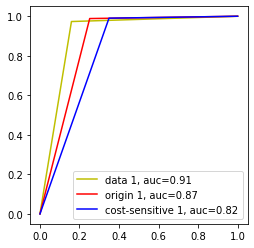

In [799]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

 
sm = SMOTE(random_state=42)
svc = tree.DecisionTreeClassifier(max_depth=20)
X_res, y_res = sm.fit_resample(x_sum, y)
svc.fit(X_res, y_res)


y_pred_proba = svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, 'y',label="data 1, auc="+str(np.round(auc,2)))


sm = SMOTE(random_state=42)
svc = tree.DecisionTreeClassifier(max_depth=20)
X_res, y_res = x_sum, y 
svc.fit(X_res, y_res)


y_pred_proba = svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, 'r',label="origin 1, auc="+str(np.round(auc,2)))


svc = tree.DecisionTreeClassifier(max_depth=20, class_weight={0:0.03/0.97, 1:1})
X_res, y_res = x_sum, y
svc.fit(X_res, y_res)


y_pred_proba = svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, 'b',label="cost-sensitive 1, auc="+str(np.round(auc,2)))
plt.axis('square')
plt.legend(loc=4)
plt.show()

In [800]:
x_sum, y = circle_data(970,30)

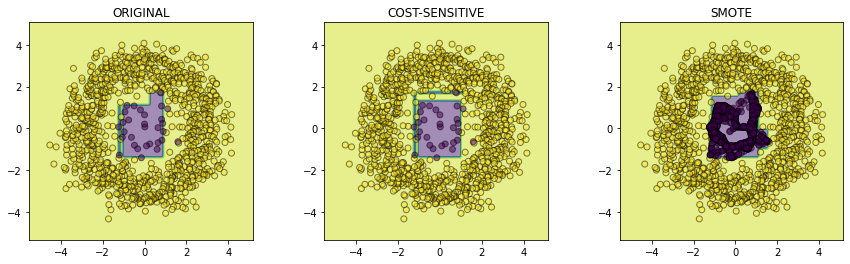

In [801]:

svc = tree.DecisionTreeClassifier(max_depth=20, class_weight={1:0.03/0.97, 0:1})
X_res, y_res = x_sum, y
svc.fit(X_res, y_res)

fig, ax = plt.subplots(ncols=3, figsize=(15,4))
disp = DecisionBoundaryDisplay.from_estimator(
    svc, x_sum, response_method="predict",
    alpha=0.5,  ax=ax[1]
 )
disp.ax_.scatter(x_sum[:, 0], x_sum[:, 1], c=y, edgecolor="k",alpha=0.5)
disp.ax_.set_title("COST-SENSITIVE")


svc = tree.DecisionTreeClassifier(max_depth=20, class_weight={0:1, 1:1})
X_res, y_res = x_sum, y
svc.fit(X_res, y_res)

disp = DecisionBoundaryDisplay.from_estimator(
    svc, x_sum, response_method="predict",
    alpha=0.5,  ax=ax[0]
 )
disp.ax_.scatter(x_sum[:, 0], x_sum[:, 1], c=y, edgecolor="k",alpha=0.5)
disp.ax_.set_title("ORIGINAL")
 
sm = SMOTE(random_state=42)
svc = tree.DecisionTreeClassifier(max_depth=20)
X_res, y_res = sm.fit_resample(x_sum, y)
svc.fit(X_res, y_res)

disp = DecisionBoundaryDisplay.from_estimator(
    svc, x_sum, response_method="predict",
    alpha=0.5, ax=ax[2],
 )
disp.ax_.scatter(X_res[:, 0], X_res[:, 1], c=y_res, edgecolor="k",alpha=0.5)
disp.ax_.set_title("SMOTE")

for a in ax:
    a.set_aspect("equal")
plt.show()

In [802]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [803]:
x_sum, y = circle_data(970,30)


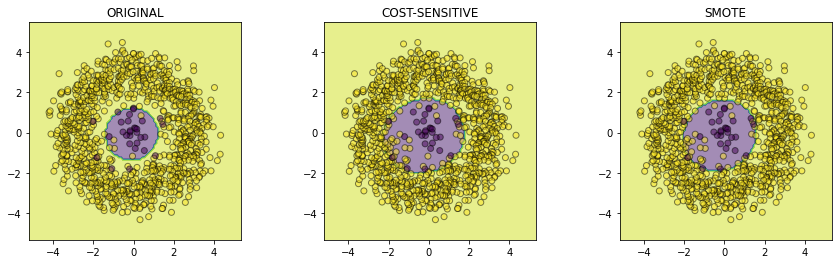

In [804]:

lr = LogisticRegression(class_weight={1:0.03/0.97, 0:1}, max_iter=300, C=np.inf)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
svc  = pipe
X_res, y_res = x_sum, y
svc.fit(X_res, y_res)

fig, ax = plt.subplots(ncols=3, figsize=(15,4))
disp = DecisionBoundaryDisplay.from_estimator(
    svc, x_sum, response_method="predict",
    alpha=0.5,  ax=ax[1]
 )
disp.ax_.scatter(x_sum[:, 0], x_sum[:, 1], c=y, edgecolor="k",alpha=0.5)
disp.ax_.set_title("COST-SENSITIVE")


lr = LogisticRegression(class_weight={1:1, 0:1}, max_iter=300, C=np.inf)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])

svc  = pipe
X_res, y_res = x_sum, y
svc.fit(X_res, y_res)

disp = DecisionBoundaryDisplay.from_estimator(
    svc, x_sum, response_method="predict",
    alpha=0.5,  ax=ax[0]
 )
disp.ax_.scatter(x_sum[:, 0], x_sum[:, 1], c=y, edgecolor="k",alpha=0.5)
disp.ax_.set_title("ORIGINAL")
 
sm = SMOTE(random_state=42)
lr = LogisticRegression(class_weight={1:1, 0:1}, max_iter=300, C=np.inf)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
svc = pipe
X_res, y_res = sm.fit_resample(x_sum, y)
svc.fit(X_res, y_res)

disp = DecisionBoundaryDisplay.from_estimator(
    svc, x_sum, response_method="predict",
    alpha=0.5, ax=ax[2],
 )
disp.ax_.scatter(x_sum[:, 0], x_sum[:, 1], c=y, edgecolor="k",alpha=0.5)
disp.ax_.set_title("SMOTE")

for a in ax:
    a.set_aspect("equal")
plt.show()

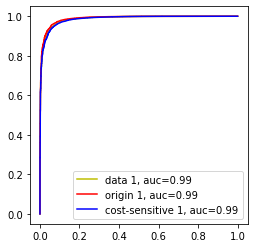

In [805]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

 
sm = SMOTE(random_state=42)
lr = LogisticRegression(class_weight={1:1, 0:1}, max_iter=300, C=np.inf)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
svc  = pipe
X_res, y_res = sm.fit_resample(x_sum, y)
svc.fit(X_res, y_res)


y_pred_proba = svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, 'y',label="data 1, auc="+str(np.round(auc,2)))


sm = SMOTE(random_state=42)
lr = LogisticRegression(class_weight={1:1, 0:1}, max_iter=300, C=np.inf)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
svc  = pipe
X_res, y_res = x_sum, y 
svc.fit(X_res, y_res)


y_pred_proba = svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, 'r',label="origin 1, auc="+str(np.round(auc,2)))


lr = LogisticRegression(class_weight={1:0.03/0.97, 0:1}, max_iter=300, C=np.inf)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
svc  = pipe

X_res, y_res = x_sum, y
svc.fit(X_res, y_res)


y_pred_proba = svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, 'b',label="cost-sensitive 1, auc="+str(np.round(auc,2)))
plt.axis('square')
plt.legend(loc=4)
plt.show()

In [759]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)


In [760]:
x,y = dist(3,0.6,num=970 , uniform=False)
x2,y2 = dist(1,0.6,num=30, uniform=False)
combined = np.vstack((x, y)).T
combined2 = np.vstack((x2, y2)).T
x_sum = np.concatenate([combined, combined2])
y = [1]*970 + [0]*30


In [761]:
from imblearn.over_sampling import SMOTE 
lr = LogisticRegression(class_weight={1:1, 0:1}, max_iter=300, C=np.inf)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])

sm = SMOTE(random_state=42)
svc = pipe 
X_res, y_res = x_sum, y
svc.fit(X_res, y_res)


Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('logistic_regression',
                 LogisticRegression(C=inf, class_weight={0: 1, 1: 1},
                                    max_iter=300))])

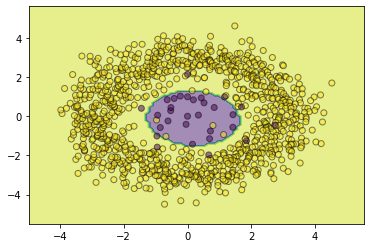

In [762]:
disp = DecisionBoundaryDisplay.from_estimator(
    svc, x_sum, response_method="predict",
    alpha=0.5,
 )
disp.ax_.scatter(x_sum[:, 0], x_sum[:, 1], c=y, edgecolor="k",alpha=0.5)

In [785]:
lr = LogisticRegression(class_weight={1:0.03/0.97, 0:1})
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])

In [786]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
svc = pipe 
X_res, y_res = x_sum, y
svc.fit(X_res, y_res)


Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('logistic_regression',
                 LogisticRegression(class_weight={0: 1,
                                                  1: 0.030927835051546393}))])

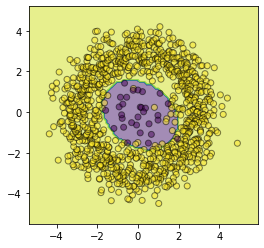

In [790]:
disp = DecisionBoundaryDisplay.from_estimator(
    svc, x_sum, response_method="predict",
    alpha=0.5,
 )
disp.ax_.scatter(x_sum[:, 0], x_sum[:, 1], c=y, edgecolor="k",alpha=0.5)
disp.ax_.set_aspect("equal")

In [791]:
from imblearn.over_sampling import SMOTE 
lr = LogisticRegression(class_weight={1:1, 0:1}, max_iter=300, C=np.inf)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])

sm = SMOTE(random_state=42)
svc = pipe
X_res, y_res = sm.fit_resample(x_sum, y)
svc.fit(X_res, y_res)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('logistic_regression',
                 LogisticRegression(C=inf, class_weight={0: 1, 1: 1},
                                    max_iter=300))])

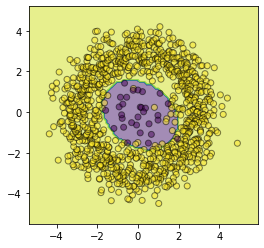

In [792]:
disp = DecisionBoundaryDisplay.from_estimator(
    svc, x_sum, response_method="predict",
    alpha=0.5,
 )
disp.ax_.scatter(x_sum[:, 0], x_sum[:, 1], c=y, edgecolor="k",alpha=0.5)
disp.ax_.set_aspect("equal")

In [793]:
x,y = dist(3,0.6,num=1000, uniform=False)
x2,y2 = dist(1,0.6,num=30, uniform=False)
combined = np.vstack((x, y)).T
combined2 = np.vstack((x2, y2)).T
x_sum = np.concatenate([combined, combined2])
y = [1]*1000 + [0]*30


In [612]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)

In [613]:
X.shape

(10000, 20)

In [614]:
df = pd.DataFrame(X., columns=["x", "y"])

df["val"] = pd.Series(Y).apply(lambda x: "red" if x==1 else "blue")


sns.scatterplot(df["x"], df["y"], c=df["val"]).plot()

SyntaxError: invalid syntax (1125466148.py, line 1)